In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [14]:
# Load the dataset
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)

# input
X = boston_pd.iloc[:, :-1]

# output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1],
    test_size = 0.25)

print("Train data shape of X = % s and Y = % s : "%(x_train.shape, y_train.shape))

print("Train data shape of X = % s and Y = % s : "%(x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Train data shape of X = (127, 13) and Y = (127,) : 


In [16]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)

# Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

# Calculating Mean Square Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test) ** 2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their coresponding variable names
lreg_coefficent = pd.DataFrame()
lreg_coefficent["Columns"] = x_train.columns
lreg_coefficent['Coefficent Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficent)

Mean squared Error on test set :  20.360290045715026
    Columns  Coefficent Estimate
0      CRIM            -0.127190
1        ZN             0.049226
2     INDUS             0.031853
3      CHAS             3.417839
4       NOX           -22.641060
5        RM             3.395780
6       AGE             0.009500
7       DIS            -1.598272
8       RAD             0.357792
9       TAX            -0.011904
10  PTRATIO            -1.003244
11        B             0.007329
12    LSTAT            -0.620299


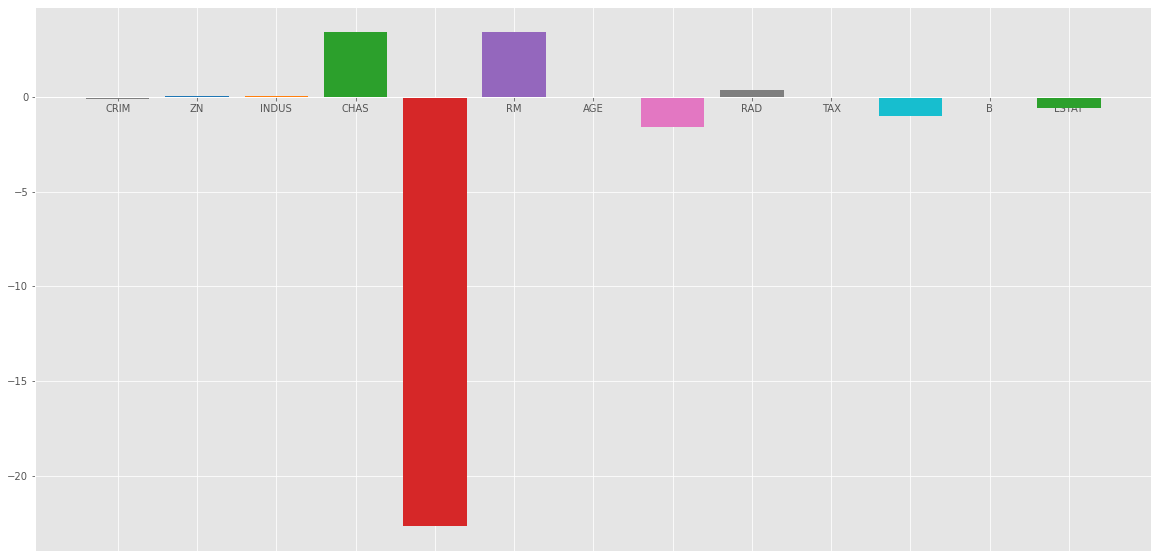

In [17]:
# Plotting the coefficent score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
         'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficent["Columns"],
lreg_coefficent['Coefficent Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [18]:
# Import Ridge Regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR  = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred1 = ridgeR.predict(x_test)

# Calculating Mean Square Error (mse)
mean_squared_error_ridge = np.mean((lreg_y_pred - y_test) ** 2)
print("Mean squared Error on test set : ", mean_squared_error_ridge)

# Putting together the coefficient and their coresponding variable names
ridge_coefficent = pd.DataFrame()
ridge_coefficent["Columns"] = x_train.columns
ridge_coefficent['Coefficent Estimate'] = pd.Series(ridgeR.coef_)

print(ridge_coefficent)

Mean squared Error on test set :  20.360290045715026
    Columns  Coefficent Estimate
0      CRIM            -0.123029
1        ZN             0.051428
2     INDUS            -0.020905
3      CHAS             3.443167
4       NOX           -11.383609
5        RM             3.422720
6       AGE             0.000122
7       DIS            -1.425374
8       RAD             0.333089
9       TAX            -0.012623
10  PTRATIO            -0.882725
11        B             0.008072
12    LSTAT            -0.629766


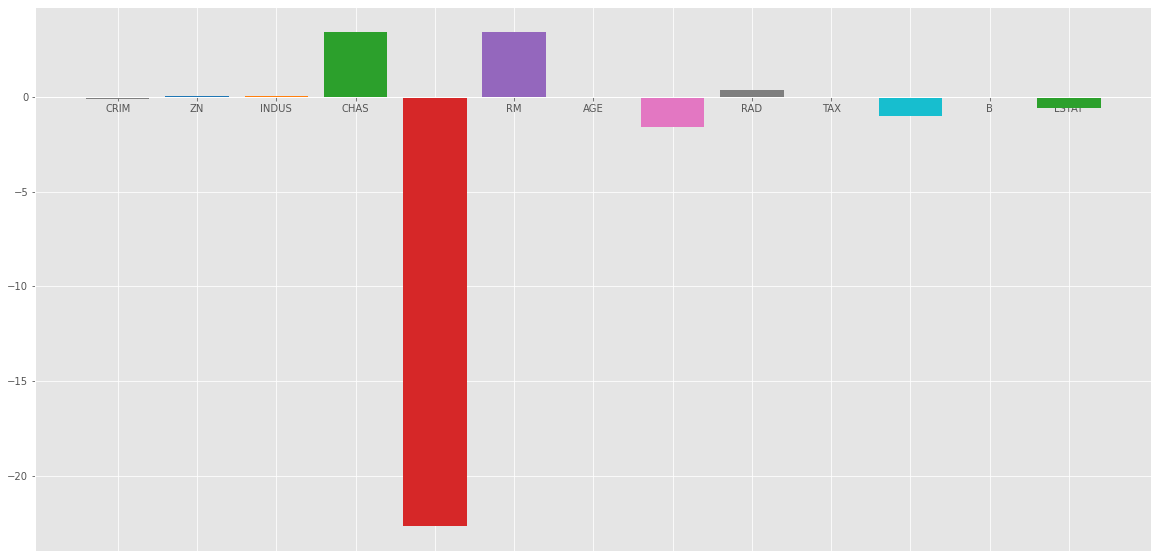

In [19]:
# Plotting the coefficent score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
         'tab:cyan', 'tab:orange', 'tab:green', 'tab:blue', 'tab:olive']

ax.bar(lreg_coefficent["Columns"],
lreg_coefficent['Coefficent Estimate'],
color = color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

In [20]:
# Import Lasso Regression from sklearn library
from sklearn.linear_model import Lasso

#Train the model
lasso  = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# Calculating Mean Square Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test) ** 2)
print("Mean squared Error on test set : ", mean_squared_error)

# Putting together the coefficient and their coresponding variable names
lasso_coefficent = pd.DataFrame()
lasso_coefficent["Columns"] = x_train.columns
lasso_coefficent['Coefficent Estimate'] = pd.Series(lasso.coef_)

print(lasso_coefficent)

Mean squared Error on test set :  20.360290045715026
    Columns  Coefficent Estimate
0      CRIM            -0.083556
1        ZN             0.056027
2     INDUS            -0.000000
3      CHAS             0.000000
4       NOX            -0.000000
5        RM             0.568901
6       AGE             0.023285
7       DIS            -0.748723
8       RAD             0.318704
9       TAX            -0.016235
10  PTRATIO            -0.796182
11        B             0.007461
12    LSTAT            -0.835776
